# Calculate and save footprints over entire period.


Needs:'Zm','Zo','hpbl','L','v_sigma','u*','wind_dir'

In [2]:
import numpy as np
import pandas as pd
import FFP_Asssment
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import time

In [108]:
import FFP_Asssment
import importlib
importlib.reload(FFP_Asssment)


Date_Range_Set = [['2022-06-21','2022-06-22'],
                  ['2022-12-21','2022-12-22']]

FFP = FFP_Asssment.RunClimatology('BB2',Date_Range_Set=Date_Range_Set)



Rasterizing bassemap
12 records flagged for low USTAR
USTAR 0.038939282 below 0.1
1 records flagged for bad wind_dir
Processing: 31 out of 43 input records
Processing Batch 0:5
Processing Batch 5:10
Processing Batch 10:15
Processing Batch 15:20
Processing Batch 20:25
Processing Batch 25:30
Processing Batch 30:35
Processing Batch 35:40
Processing Batch 40:45
2 records flagged for low USTAR
USTAR 0.07846372 below 0.1
Processing: 47 out of 49 input records
Processing Batch 0:5
Processing Batch 5:10
Processing Batch 10:15
Processing Batch 15:20
Processing Batch 20:25
Processing Batch 25:30
Processing Batch 30:35
Processing Batch 35:40
Processing Batch 40:45
Processing Batch 45:50
0.0068716581400717815 [0.00687166]

0.00369181874262806 [0.00369182]

0.0024798425184834882 [0.00247984]



<Axes: >

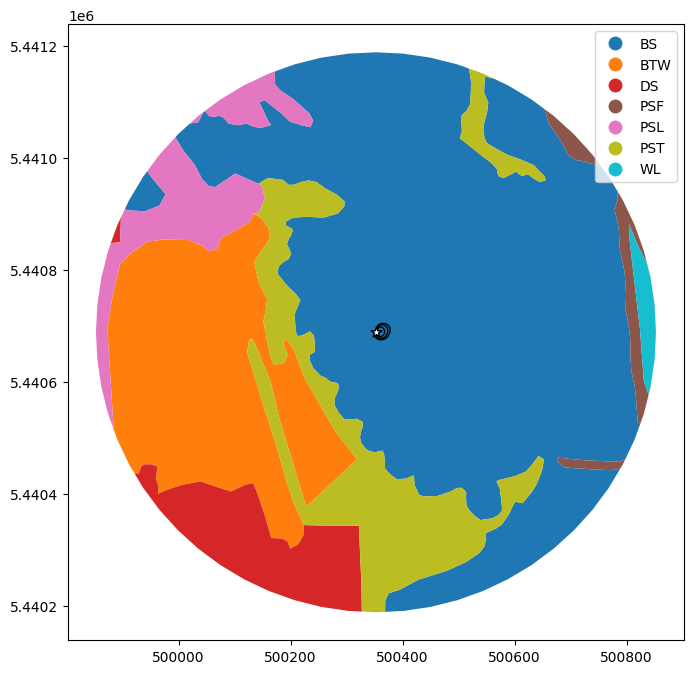

In [110]:
fig,ax=plt.subplots(figsize=(8,8))
FFP.baseVector.plot(ax=ax,column='Code',legend=True)
FFP.contour_levels.plot(ax=ax,edgecolor='k',facecolor='None')
FFP.Site_UTM.plot(ax=ax,marker='*',color='white',edgecolor='k',markersize=65)

In [33]:
# Date_Range = ['2022-01-01','2022-01-02']
Time_Range_Set = [['20:00','08:00'],['20:00','23:59']]
# # print(type(Date_Range[0]),type(Time_Range[0]))
# # if type(Time_Range[0]) == type(Time_Range):
# #     print('a')
# Range_Set = pd.date_range(start=Date_Range[0],end=Date_Range[1],freq='30T',inclusive='both')
for i,Time_Range in enumerate(Time_Range_Set):
    Range_Set = df.index[df.index.indexer_between_time(Time_Range[0],Time_Range[1])]
    df.loc[df.index.isin(Range_Set),'Subset']=chr(ord('@')+i+1)
# Range_Set
df

# df

,L,USTAR,wind_speed,wind_dir,V_SIGMA,canopy_height,hpbl,Subset
TIMESTAMP,,,,,,,,
2023-01-01 00:30:00,-170.961870,0.061549,0.638746,186.611570,0.255538,NaN,NaN,A
2023-01-01 01:00:00,14.254044,0.055916,0.461765,151.737350,0.456779,NaN,NaN,A
2023-01-01 01:30:00,-269.345430,0.155473,0.220486,32.894787,0.312367,NaN,NaN,A
2023-01-01 02:00:00,57.640230,0.109084,0.130261,142.393500,0.379237,NaN,NaN,A
2023-01-01 02:30:00,-11.441779,0.050135,0.210721,195.484400,0.390937,NaN,NaN,A
...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
2023-12-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
2023-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [122]:
import numpy as np
Met = pd.read_csv(f"C:/highfreq/{SITE}/footprint/2022/Kljun_ffp.csv",
                  parse_dates=['TIMESTAMP'],index_col='TIMESTAMP')
Met = Met.drop(columns=['canopy_height'])


BL = pd.read_csv(f'../Interp_NARR_Data/interpolatedPointEstimates/hpbl_{SITE}.csv',
                    parse_dates=['TIMESTAMP'],index_col='TIMESTAMP')
BL = BL.rename(columns={f'{SITE}':'hpbl'})

Met = Met.join(BL)

Subset = Met.dropna()[:100]
FFP.run(Subset)
# Subset['hpbl']

1 records flagged for low USTAR
USTAR 0.057622 below 0.1
1 records flagged for bad wind_dir
Processing: 98 out of 100 input records
Processing Batch 0:5
Processing Batch 5:10
Processing Batch 10:15
Processing Batch 15:20
Processing Batch 20:25
Processing Batch 25:30
Processing Batch 30:35
Processing Batch 35:40
Processing Batch 40:45
Processing Batch 45:50
Processing Batch 50:55
Processing Batch 55:60
Processing Batch 60:65
Processing Batch 65:70
Processing Batch 70:75
Processing Batch 75:80
Processing Batch 80:85
Processing Batch 85:90
Processing Batch 90:95
Processing Batch 95:100


In [124]:
FFP.data['process'].describe()

count    100.000000
mean       0.980000
std        0.140705
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: process, dtype: float64

In [57]:
import importlib
importlib.reload(FFP_Asssment)
# Site = 'DSM'
Year = 2022

ini_file = 'ini/FFP.ini'
import configparser
ini = configparser.ConfigParser()
ini.read(ini_file)

for Site in ['DSM','RBM','BB','BB2']:

    # This is just a temporary application 
    # Ideally we can get the data pipeline to output a csc with these values
    rdb.Make(ini['Paths']['dbase'],Site,Year,['L','USTAR','wind_speed','wind_dir','V_SIGMA'],'Temp')

    Met = pd.read_csv(f'Temp/{Site}_FP_Data.csv',parse_dates={'timestamp':['date','time']},index_col='timestamp')
    BL = pd.read_csv(f'../Read_NetCDF_Data/Outputs/NARR_interpolated_hpbl_{Year}.csv',
                    parse_dates=['timestamp'],index_col='timestamp')

    Met = Met.join(BL[Site])
    Met = Met.rename(columns={Site:'hpbl'})

    Met = Met.loc[((Met['hpbl']>10)*(Met['USTAR']>0.1))].dropna()

    print(Met.shape)
    # Met = Met.sample(100) # Use "Sample" for testing
    # print(Met.shape)

    FFP = FFP_Asssment.RunClimatology('ini/FFP.ini',Site)

    T1 = time.time()

    FFP.run(Met,processes=int(ini['Multi_Processing']['Processes']))

    print('Runtime: ',time.time()-T1)
    print()


Writing data to:  Temp/DSM_FP_Data.csv
(12239, 6)
204 records flagged for bad wind_dir
Processing: 12035 out of 12239 input records
Processing Batch 0:500
Processing Batch 500:1000
Processing Batch 1000:1500
Processing Batch 1500:2000
Processing Batch 2000:2500
Processing Batch 2500:3000
Processing Batch 3000:3500
Processing Batch 3500:4000
Processing Batch 4000:4500
Processing Batch 4500:5000
Processing Batch 5000:5500
Processing Batch 5500:6000
Processing Batch 6000:6500
Processing Batch 6500:7000
Processing Batch 7000:7500
Processing Batch 7500:8000
Processing Batch 8000:8500
Processing Batch 8500:9000
Processing Batch 9000:9500
Processing Batch 9500:10000
Processing Batch 10000:10500
Processing Batch 10500:11000
Processing Batch 11000:11500
Processing Batch 11500:12000
Processing Batch 12000:12500
Runtime:  377.69585847854614

Writing data to:  Temp/RBM_FP_Data.csv
(7982, 6)
349 records flagged for bad wind_dir
Processing: 7633 out of 7982 input records
Processing Batch 0:500
Proce

In [41]:
flagged = Met.loc[(
                ((Met['wind_dir']>-15) & (Met['wind_dir']<10))
                |
                ((Met['wind_dir']>15) & (Met['wind_dir']<20))
                                        )].shape[0]

# Met.loc[((Met['wind_dir']>-15)|(Met['wind_dir']<45))]